# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [1]:
# imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Determine Business Understanding

The used car dealership wants to sell as many cars as possible to customers. In order to do so, the used car dealership wants to know what consumers value the most when looking to buy used cars. The business wants to predict what a used car's value would be from the customer's persepective. The customer's primary objective is to buy a used car that has all the features they are looking for, low mileage, and undamaged interior/exterior so that they get the best value. The success criteria is that the used dealership will have a lot of sales where the customer is buying many of their used cars. 

#### Assess Situation

The resources available is a dataset that contains various information about a used car and what it was valued at. This investigation needs to be complete in a week and the results need to be of high quality. Some assumptions made are that the value of the used cars in the dataset is what customers actually bought the used car for. The dataset is also a slice of all the data, so another assumption is that it is an accurate representation of the overall data. A risk is that a lot of the selected data might be malformed or skewed, that may negatively affect the model that predicts how a customer will value the used car based on certain parameters. The cost of this project is the time needed for all the data analysis and modeling. But the benefits are that the revenue of the used dealership could increase drastically. 


#### Determine Data Mining Goals

There are two intended outputs of this project. The first is to identify the important aspects of a used vehicle that consumers value. The second is a predicted value of a used car. The success criteria is that we have a model that estimates a value of a used car that the customer also agrees on, leading them to buy the used vehicle. 

#### Produce Project Plan

There are many stages that need to be conducted for this project. 

1. Understand the data

- This includes looking at the different columns of the dataset and performing exploratory data analysis. During this stage, issues with the data needs to be identified so that we know exactly how the data should be cleaned/prepped for the machine learning models. 

2. Clean and Prepare the data

- Based on the first step, clean and prepare the data for the modeling phase. At this point, determine what columns will be kept and how the data will be transformed. 

3. Build, train, and evaluate the model

- Determine what model should be used, train the model, and evaluat the accuracy of the model based on the selected loss function. For this project, we will likely use Mean Absolute Error (MAE) or Mean Squared Error (MSE). 

4. Final analysis and conclusion

- After all the modelung and data analysis, conclude the learnings in a clear and concise manner. In this case, we need to inform the used car dealership about what consumers value the most when looking to buy a used car. 

Steps 1 and 2 are the most important, and will take longer than steps 3 and 4, because bad data can have a negative impact on the data analysis and machine learning. Without good data, the information conveyed to the used car dealership could hurt the sales.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Collect Initial Data

A vehicles dataset was provided to us from Kaggle. The data is located in the data folder of this project. The data is loaded into the pandas dataframe called vehicles_df. 

In [2]:
vehicles_df = pd.read_csv('./data/vehicles.csv')

#### Describe Data

In [3]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

The data has a mix of integers, floats, and strings for the column values. There are 18 features in the dataset. There are 426,880 entries in the dataset, but majority of the columns have some null values. Each entry can be identified by the id or VIN values. The data acquired satisfies the relevant requirements to inform the used car dealership about what customers value when looking to buy a used car. The values of id and VIN are random, unique values and hence don't contribute to customers buying new vehicles. Some of the data will need to be cleaned up or filled for better data analysis and modeling. 

#### Explore Data

In [4]:
vehicles_df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
217125,7304123509,rochester,26990,2018.0,bmw,3 series 330i xdrive sedan,good,NaN,gas,13088.0,clean,automatic,WBA8D9G55JNU69602,NaN,NaN,sedan,NaN,mn
252750,7309822632,jersey shore,10000,2021.0,honda,civic,NaN,NaN,gas,100000.0,clean,other,NaN,NaN,NaN,NaN,NaN,nj
20242,7308368085,little rock,27900,2014.0,ram,3500,NaN,8 cylinders,gas,66788.0,NaN,automatic,3C7WRSCJ7EG281400,rwd,NaN,pickup,white,ar
150571,7315320615,fort wayne,3500,2006.0,mitsubishi,galant,good,6 cylinders,gas,147541.0,clean,automatic,4A3AB26F46E072866,fwd,full-size,sedan,silver,in
166796,7311516157,"kansas city, MO",0,2016.0,chevrolet,tahoe,excellent,8 cylinders,gas,119752.0,clean,automatic,1GNSKBKC5GR282395,4wd,full-size,SUV,red,ks
107177,7314063697,panama city,20000,1989.0,chevrolet,blazer,good,8 cylinders,gas,76570.0,clean,automatic,NaN,rwd,full-size,truck,black,fl
114596,7310829960,space coast,37990,2020.0,cadillac,ct5 premium luxury,good,NaN,gas,8132.0,clean,other,1G6DT5RK1L0130287,NaN,NaN,sedan,black,fl
240444,7316460587,raleigh / durham / CH,0,2014.0,ford,fusion,NaN,NaN,NaN,NaN,NaN,NaN,1FA6P0H76E5402550,NaN,NaN,NaN,NaN,nc
212016,7305863652,duluth / superior,4680,2007.0,gmc,sierra,good,8 cylinders,gas,212332.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,mn
146299,7311047596,springfield,11495,2008.0,chevrolet,silverado 1500 lt1,NaN,NaN,gas,184721.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,il


From the sample of the dataframe, I can see that there are alot of entities with empty values for some of the columns. I also observe that some columns have repeated info, meaning that certain columns can be removed. Additionally, columns like VIN and ID are random and should be dropped. 

In [5]:
vehicles_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


Looking at the table generated from the describe of the dataframe, we notice 2 main things:

1. Used car prices ranges from 0 to $3.73B with the avg price at ~75k
2. The data contains data from year 1900 to 2022, with the avg year of 2011

From point 1, we need to check the validity of the prices because the range is absurd, with a max of $3.73B.

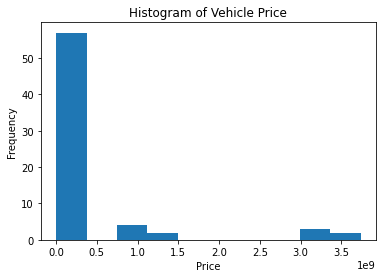

68


In [6]:
plt.hist(vehicles_df[vehicles_df['price'] > 500000]['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Vehicle Price')
plt.show()

print(len(vehicles_df[vehicles_df['price'] > 500000]))

There are 68 vehicles with absurd prices above $500k. 

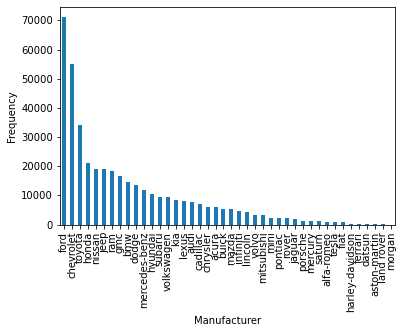

In [7]:
vehicles_df['manufacturer'].value_counts().plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


Of all the car manufacturers, very few would have high prices and the vehicle counts of manufacturers that would have expensive cars has a low count. 

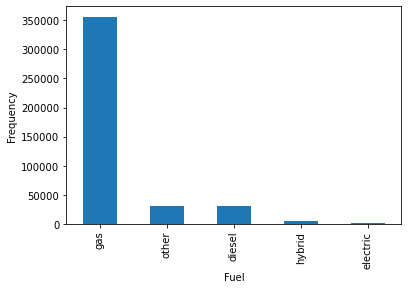

In [8]:
vehicles_df['fuel'].value_counts().plot(kind='bar')
plt.xlabel('Fuel')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


Majority of the cars take gas for the fuel, so fuel type may not be an important factor in how customers value used car prices. 

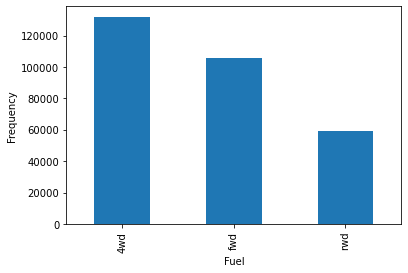

In [9]:
vehicles_df['drive'].value_counts().plot(kind='bar')
plt.xlabel('Fuel')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


There roughly similar counts of the different drive trains, meaning the dataset has a good distribution of vehicles based on drive train. 

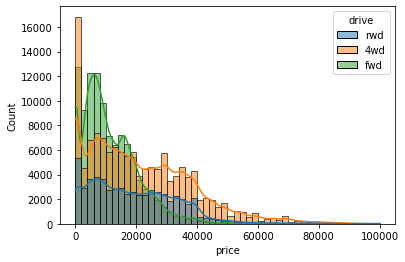

In [10]:
sns.histplot(data=vehicles_df[vehicles_df['price'] <= 100000], x="price", hue="drive", kde=True, bins=50)
plt.show()


Drive train type seems to have some impact on the value of the vehicle. The scale is adjusted to include vehicles with prices < 100k for a view of the relevant distribution. 

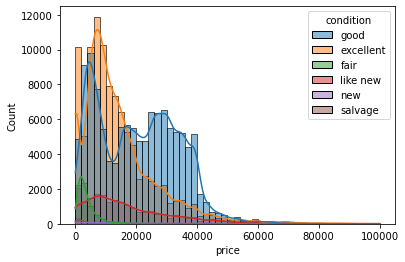

In [11]:
sns.histplot(data=vehicles_df[vehicles_df['price'] <= 100000], x="price", hue="condition", kde=True, bins=50)
plt.show()

The condition of the vehicle seems to have a huge impact on how a car is valued. The scale is adjusted to include vehicles with prices < 100k for a view of the relevant distribution. 

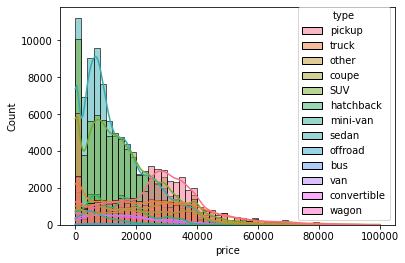

In [12]:
sns.histplot(data=vehicles_df[vehicles_df['price'] <= 100000], x="price", hue="type", kde=True, bins=50)
plt.show()

Vehicle type has an effect on the price. The scale is adjusted to include vehicles with prices < 100k for a view of the relevant distribution. 

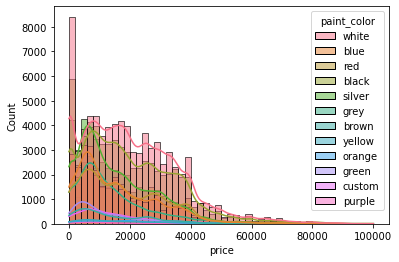

In [13]:
sns.histplot(data=vehicles_df[vehicles_df['price'] <= 100000], x="price", hue="paint_color", kde=True, bins=50)
plt.show()

Paint color has an impact on how customers value a used car. 

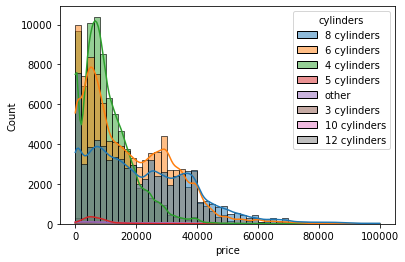

In [14]:
sns.histplot(data=vehicles_df[vehicles_df['price'] <= 100000], x="price", hue="cylinders", kde=True, bins=50)
plt.show()

The number of cylinders in the engine also plays a role in how customers value a used car. 

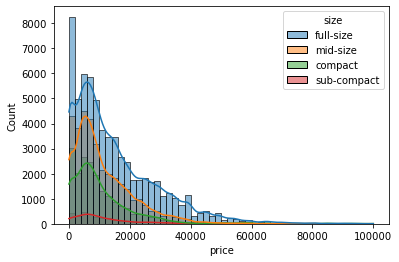

In [15]:
sns.histplot(data=vehicles_df[vehicles_df['price'] <= 100000], x="price", hue="size", kde=True, bins=50)
plt.show()

In [16]:
vehicles_df[(vehicles_df['type'] == 'truck') & (vehicles_df['size'] == 'full-size')].head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al
65,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,NaN,rwd,full-size,truck,white,al
177,7316870143,birmingham,22950,2014.0,ford,f150 supercrew cab xlt,excellent,8 cylinders,gas,166380.0,clean,automatic,NaN,4wd,full-size,truck,black,al
193,7316734951,birmingham,5900,1998.0,ford,f150,excellent,8 cylinders,gas,214000.0,clean,automatic,NaN,NaN,full-size,truck,red,al
213,7316544266,birmingham,32000,2008.0,chevrolet,silverado 2500,good,8 cylinders,diesel,109600.0,clean,automatic,NaN,4wd,full-size,truck,white,al


Size can be used instead of type. Can use type to fill the missing size values. 

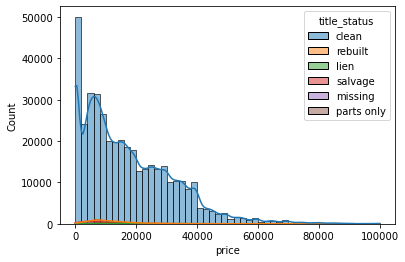

In [17]:
sns.histplot(data=vehicles_df[vehicles_df['price'] <= 100000], x="price", hue="title_status", kde=True, bins=50)
plt.show()

If the title_status of the car is not clean, then the value of the car is very low, so this is a good feature to include. 

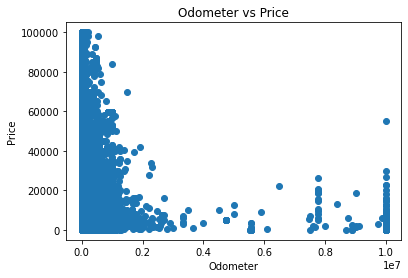

In [18]:
plt.scatter(vehicles_df[vehicles_df['price'] <= 100000]['odometer'], vehicles_df[vehicles_df['price'] <= 100000]['price'])
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Odometer vs Price')
plt.show()


The previous amount of miles driven on the car seems to have some impact on the price. The scale is adjusted to include vehicles with prices < 100k for a view of the relevant distribution. 

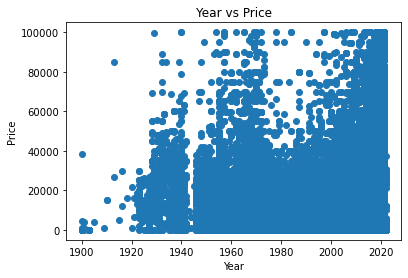

In [19]:
plt.scatter(vehicles_df[vehicles_df['price'] <= 100000]['year'], vehicles_df[vehicles_df['price'] <= 100000]['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs Price')
plt.show()


The scale is adjusted to include vehicles with prices < 100k for a view of the relevant distribution. The dataset contains vehicles from over a century ago, which is not needed for this project. We want more relevant data. 

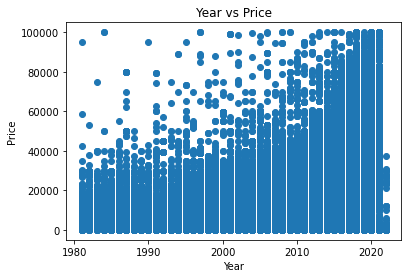

In [20]:
plt.scatter(vehicles_df[(vehicles_df['price'] <= 100000) & (vehicles_df['year'] > 1980)]['year'], vehicles_df[(vehicles_df['price'] <= 100000) & (vehicles_df['year'] > 1980)]['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs Price')
plt.show()

After adjusting the years to look at the year by price after year 1980, we can see that the max price increases as the year increases. 

In [21]:
Q1 = vehicles_df['price'].quantile(0.25)
Q3 = vehicles_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the min and max price value that aren't outliers
min_price = vehicles_df['price'].loc[vehicles_df['price'] >= Q1 - 1.5*IQR].min()
max_price = vehicles_df['price'].loc[vehicles_df['price'] <= Q3 + 1.5*IQR].max()

print("Min price value that aren't outliers:", min_price)
print("Max price value that aren't outliers:", max_price)

Min price value that aren't outliers: 0
Max price value that aren't outliers: 57341


The max price value that isn't an outlier is ~$58k. To include more vehicles and prices, the data kept should be vehicles with prices up to $100k to $150k. 

#### Verify Data Quality

The data quality is not the best. There are some absurdities in some of the feature values, such as where price of a used car is too high for the make and model that it corresponds to. Additionally, there are many features with null/empty values that need to be dealt with. Also, some features are simply not relevant to the modeling and data analysis. 

Here are a few things that I plan to do to improve the data quality, based on my initial exploration of the data:

1. Drop the irrelevant features of the data
2. Drop entities where the price of the cars are absurdly high or remove the outlier prices
3. Attempt to fill the null/empty values with correct values for the data

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Select Data

In [22]:
selected_data = vehicles_df

# Drop id and VIN
selected_data = selected_data.drop(columns=['id', 'VIN'])

# drop region, fuel, and size
selected_data = selected_data.drop(columns=['region', 'fuel'])

selected_data.head()

,price,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [23]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  size          120519 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
 13  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 45.6+ MB


Based on the data exploratory analysis, we decided to drop the unneeded featues of id, VIN, region, and fuel. 

#### Clean Data

In [24]:
cleaned_data = selected_data

# keep rows with price between below 150000
cleaned_data = cleaned_data[(cleaned_data['price'] <= 150000)]

# keep data after year 2000
cleaned_data = cleaned_data[cleaned_data['year'] >= 2000]

cleaned_data.head()

,price,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,size,type,paint_color,state
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,57923.0,clean,other,NaN,NaN,pickup,white,al
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,71229.0,clean,other,NaN,NaN,pickup,blue,al
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,19160.0,clean,other,NaN,NaN,pickup,red,al
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,41124.0,clean,other,NaN,NaN,pickup,red,al
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,128000.0,clean,automatic,rwd,full-size,truck,black,al


In [25]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400264 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         400264 non-null  int64  
 1   year          400264 non-null  float64
 2   manufacturer  387266 non-null  object 
 3   model         396586 non-null  object 
 4   condition     234445 non-null  object 
 5   cylinders     230249 non-null  object 
 6   odometer      396015 non-null  float64
 7   title_status  392447 non-null  object 
 8   transmission  397825 non-null  object 
 9   drive         278427 non-null  object 
 10  size          109586 non-null  object 
 11  type          317137 non-null  object 
 12  paint_color   278897 non-null  object 
 13  state         400264 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 45.8+ MB


To clean the data, remove cars from years before 2000 and cars that cost more than $150k. This was determined from our exploratory data analysis. 

#### Construct and Integrate Data

In [26]:
def fillData(source_df, dest_df, key_col, val_col):
    data = source_df[[key_col, val_col]].dropna()
    data = data.drop_duplicates(subset=[key_col])

    data_dict = dict(zip(data[key_col], data[val_col]))

    dest_df[val_col] = dest_df[key_col].map(data_dict)

In [27]:
final_data = cleaned_data
source_data = vehicles_df
source_data['make_model'] = source_data['manufacturer'] + ' ' + source_data['model']

# fill manufacturer based on model
fillData(source_data, final_data, 'model', 'manufacturer')

final_data['make_model'] = final_data['manufacturer'] + ' ' + final_data['model']

# fill cylinders based on make_model
fillData(source_data, final_data, 'make_model', 'cylinders')

# fill transmission based on make_model
fillData(source_data, final_data, 'make_model', 'transmission')

# fill drive based on make_model
fillData(source_data, final_data, 'make_model', 'drive')

# fill size based on type
fillData(source_data, final_data, 'type', 'size')

# drop make_model and state
final_data = final_data.drop(columns=['make_model'])

final_data.head()


,price,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,size,type,paint_color,state
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,57923.0,clean,other,4wd,full-size,pickup,white,al
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,71229.0,clean,other,4wd,full-size,pickup,blue,al
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,19160.0,clean,other,4wd,full-size,pickup,red,al
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,41124.0,clean,other,4wd,full-size,pickup,red,al
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,128000.0,clean,automatic,rwd,full-size,truck,black,al


In [28]:
# drop duplicate rows
final_data = final_data.drop_duplicates()

In [29]:
# drop rows with missing values
final_data = final_data.dropna()

In [30]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105029 entries, 27 to 426878
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         105029 non-null  int64  
 1   year          105029 non-null  float64
 2   manufacturer  105029 non-null  object 
 3   model         105029 non-null  object 
 4   condition     105029 non-null  object 
 5   cylinders     105029 non-null  object 
 6   odometer      105029 non-null  float64
 7   title_status  105029 non-null  object 
 8   transmission  105029 non-null  object 
 9   drive         105029 non-null  object 
 10  size          105029 non-null  object 
 11  type          105029 non-null  object 
 12  paint_color   105029 non-null  object 
 13  state         105029 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 12.0+ MB


To construct and integrate the data, fill the missing values based on values already in the data set. For the rest of the entities that still have null values remaining after this process, drop entities that contain any null features. Also, drop any duplicate entities. 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Select Modeling Technique

The modeling technique that will be used is Linear Regression as the goal is to use multiple features to predict a numerical value. We will use Normal Linear Regression and Ridge Linear Regression

#### Generate Test Design

We will split the data into train and dev sets and utilize R2 and MSE to determine the best model. We will also utilize cross validation to prevent overfitting and to select the best model.

#### Build Model

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.inspection import permutation_importance

In [32]:
X = final_data.drop(columns=['price'])
y = final_data['price']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

categorical_columns = ['manufacturer', 'model', 'condition', 'cylinders', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'size', 'state']
numerical_columns = ['year', 'odometer']

In [33]:
# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a transformer for numerical features
numerical_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

In [34]:

# Create a new pipeline with the preprocessor and linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate the accuracy (R-squared score)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)


R-squared score: 0.6921249000000591
Mean squared error: 53051003.73212796


In [35]:
# Calculate permutation importance
perm_importance = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

# Access feature importances
feature_importances = perm_importance.importances_mean

# Get feature names
feature_names = X.columns

# Create a DataFrame with the feature names and feature importances. Sort by feature importance.
feature_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances}).sort_values('importance', ascending=False)

feature_df

,feature,importance
0,year,0.376950
2,model,0.273083
4,cylinders,0.153426
5,odometer,0.067552
1,manufacturer,0.054690
7,transmission,0.041657
8,drive,0.021876
12,state,0.011682
10,type,0.008683
3,condition,0.006734


In [36]:
# Create a pipeline with Ridge regression
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

ridge_param_grid = {
    'ridge__alpha': 10**np.linspace(-3, 3, 10)
}

# Perform GridSearchCV with cross-validation for Ridge
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, scoring="neg_mean_squared_error", cv=5)
ridge_grid_search.fit(X_train, y_train)

print("\nRidge Best Parameters: ", ridge_grid_search.best_params_)
print("Ridge Best Cross-Validation Score: {:.2f}".format(ridge_grid_search.best_score_))
print("Ridge Test Score: {:.2f}".format(ridge_grid_search.score(X_test, y_test)))

# calculate the mse
y_pred = ridge_grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# calculate the r2 score
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)



Ridge Best Parameters:  {'ridge__alpha': 2.154434690031882}
Ridge Best Cross-Validation Score: -53104294.89
Ridge Test Score: -53288398.07
Mean squared error: 53288398.07193539
R-squared score: 0.6907472105886263


In [37]:
# Calculate permutation importance
perm_importance = permutation_importance(ridge_grid_search.best_estimator_, X_test, y_test, n_repeats=30, random_state=42)

# Access feature importances
feature_importances = perm_importance.importances_mean

# Get feature names
feature_names = X.columns

# Create a DataFrame with the feature names and feature importances. Sort by feature importance.
feature_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances}).sort_values('importance', ascending=False)

feature_df

,feature,importance
0,year,0.366236
2,model,0.219942
4,cylinders,0.135300
5,odometer,0.060426
7,transmission,0.050555
1,manufacturer,0.048751
10,type,0.030417
8,drive,0.017722
12,state,0.014034
3,condition,0.006522


#### Assess Model

The Normal Linear Regression model performed slightly better than the Ridge Linear Regression model. Normal Linear Regression model had an accuracy of 69.2% and MSE of 53051003.7 while the Ridge Linear Regression model had an accuracy of 69% and an MSE of 53288398.1. 

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Evaluate Results

The business success criteria were to identify what customers value the most when shopping for used vehicles and providing a model that the used car dealership can use to predict the price of a used car given its features. Both models meet this criteria. The selected model will be the normal linear regress model. 

#### Review Process

We correctly built the model and used the the attributes that were provided to us. These attributes of used cars will also be available in the future. No important steps were overlooked during this process, so the selected model should be good to use.

#### Determine Next Steps

No additional steps are needed based on the review.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Deployment Plan

1. Model Selection:
    - Based on our evaluation, we have selected the Normal Linear Regression model as it achieved an accuracy of 69.2% and an MSE of 53,051,003.7.
    - The model utilizes various features of used cars to predict their prices accurately.

2. Model Integration:
    - Integrate the selected model into the dealership's existing software infrastructure.
    - Ensure that the necessary libraries and dependencies are installed and compatible with the deployment environment.

3. Data Collection:
    - Continuously collect data on used cars, including relevant features such as make, model, year, mileage, condition, and more.
    - Ensure that the data collection process is automated and captures accurate and up-to-date information.

4. Data Preprocessing:
    - Implement the same data preprocessing steps used during model training to ensure consistency and accuracy.
    - Handle missing values, outliers, and perform necessary feature transformations.

5. Model Deployment:
    - Develop a user-friendly interface for dealership staff to input the features of a used car and obtain a predicted selling price.
    - Ensure that the interface is intuitive, efficient, and provides real-time predictions.


#### Monitoring and Maintenance Plan

1. Model Monitoring and Maintenance:
    - Regularly monitor the performance of the deployed model to identify any issues or deviations.
    - Implement a tool to collect user feedback and improve the model over time.
    - Occassionally retrain the model using new data to ensure its accuracy and relevance.

2. Staff Training and Support:
    - Provide training to dealership staff on how to effectively use the predictive model.
    - Offer ongoing support and assistance to address any questions or concerns.

3. Performance Evaluation:
    - Conduct regular evaluations of the model's performance against predefined metrics.
    - Assess the accuracy, precision, and recall of the model to ensure its effectiveness.

4. Continuous Improvement:
    - Continuously analyze customer feedback, market trends, and new data to identify areas for improvement.
    - Incorporate new features or techniques into the model to enhance its predictive capabilities.

#### Final Report

In this project, we cleaned data, explored the data, and built models to achieve our business goals. Our business goals were to identify what customers value the most when shopping for used vehicles and to provide a model that can be used to predict the price of a used car given its features. A linear regression model that uses all the features provided works the best for accurate prediction. The most important things that customers value when buying a used car are year, model, engine cylinders, odometer, and manufacturer. This matches other research that we have conducted, making this a satisfactory model that the used car dealership can use.

#### Review Project

Most of the project went correct and as expected. We learned how to create models to make predictions and also determine feature importance. We were able to data clean effectively to keep a good chunk of the data usable for the modeling. We now know how to approach future data mining projects effectively. 

There are a few things that we could improve. First, we should try to tweak and play around with the model to make it more accurate. Second, due to hardware limitations, we weren't able to test more complex or more modern models, as running them would take a long time on current hardware. Getting better GPUs or running our models in the cloud would lead to improvements in our processes and modeling. 